## Solving Ax = b through QR decomposition of a hessenberg matrix
This project analizes the timecomplexity of each step of solving Ax = b
while calculating the solution through qr decomposition

In [11]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import time

In [1]:
# helper method to calculate the times of the functions
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        wrapper.execution_times.append(execution_time)
        return result

    wrapper.execution_times = []
    return wrapper

### assembling A and b as defined

In [13]:
@timing_decorator
def assemble_A_and_b(size: int):
    matrix_A = np.eye(size, dtype=float)
    vector_B = np.arange(size, dtype=float)

    # create matrix A
    for i in range(size):
        for j in range(size):
            if i <= j + 1:
                matrix_A[i, j] = 1 / (i + j + 1)
            else:
                matrix_A[i, j] = 0

    # create vector b
    for i in range(size):
        vector_B[i] = np.sum(matrix_A[i])

    return matrix_A, vector_B

### qr decomposition of A

In [14]:
@timing_decorator
def qr_decomp(matrix_a: np.ndarray):
    # calculate and return the matrix Q and R for matrix A
    matrix_q = np.linalg.qr(matrix_a)[0]
    matrix_r = np.linalg.qr(matrix_a)[1]

    return matrix_q, matrix_r

### step 2: calculate Q^T*b to solve the equation system

In [15]:
# Aufgabe 1.c
@timing_decorator
def calculate_qTb(matrix_q: np.ndarray, vector_b: np.ndarray):
    # calculate and return Q^T * b
    return np.matmul(np.transpose(matrix_q), vector_b)

### step 3: solving Ax = b, through backward substitution

In [16]:
@timing_decorator
def backwards_substitution(matrix_r: np.ndarray, vector_b: np.ndarray):
    n = len(vector_b)
    vector_x = np.arange(n, dtype=float)

    # last entry of x is (last entry of b) / (r[n][n])
    vector_x[n - 1] = vector_b[n - 1] / matrix_r[n - 1][n - 1]

    # go through the other rows individually and calculate xi
    for i in range(n - 2, -1, -1):
        temp: int = 0
        for j in range(i + 1, n, 1):
            temp += matrix_r[i][j] * vector_x[j]
        vector_x[i] = (vector_b[i] - temp) / matrix_r[i][i]
    return vector_x

### step 4: calculating the times of each of the steps above

In [19]:
# execution time plotter

def plot_execution_times(matrix_sizes):
    # Lists to store execution times
    assembleAandB_times = []
    qrdecomp_times = []
    calculate_qTb_times = []
    backwardsSubstitution_times = []

    # Iterate over matrix sizes
    for N in matrix_sizes:
        # Create A and b according to the given size
        matrix_A, vector_B = assemble_A_and_b(N)

        # Assemble A and b and measure the execution time
        assemble_A_and_b(N)
        assembleAandB_times.append(assemble_A_and_b.execution_times[-1])

        # Measure the time for the qr-decomposition for A
        qr_decomp(matrix_A)
        qrdecomp_times.append(qr_decomp.execution_times[-1])

        # calculate the factor Q^T * b and measure the time
        matrix_Q, matrix_R = qr_decomp(matrix_A)
        calculate_qTb(matrix_Q, vector_B)
        calculate_qTb_times.append(calculate_qTb.execution_times[-1])

        # Calculate the solution x through backwards substitution and measure the execution time.
        backwards_substitution(matrix_R, vector_B)
        backwardsSubstitution_times.append(backwards_substitution.execution_times[-1])

    # Plot execution times
    plt.plot(matrix_sizes, assembleAandB_times, label='assemble the matrix A and vector b')
    plt.plot(matrix_sizes, qrdecomp_times, label='qr decomposition of matrix a')
    plt.plot(matrix_sizes, calculate_qTb_times, label='calculate Q^T * b')
    plt.plot(matrix_sizes, backwardsSubstitution_times, label='backwards substitution to calculate x')
    plt.xlabel('Matrix size N')
    plt.ylabel('Execution Time (s)')
    plt.title('Name: Isik Baran Sandan // Nr: 2431923 // Date and Time: ' + datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    plt.legend()
    plt.show()

### Results: Plotting the time complexities of each step for growing matrix sizes

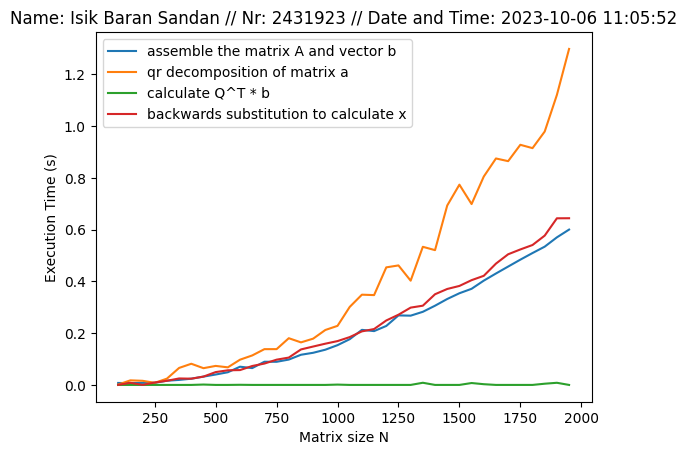

In [21]:
matrix_sizes = np.arange(100,2000,50)

plot_execution_times(matrix_sizes)